In [1]:
psrname='J1713+0747'

In [6]:
spna_dir='./J1713+0747_SPNA_wexpd/TM_WN_RN11_DM147/ptmcmc/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [7]:
# import os
# with os.scandir(spna_dir) as entries:
#         for entry in entries:
#             spna_dir=spna_dir+entry.name+'/ptmcmc/'

In [8]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir/')
from diff_chain import  Diff_chain_shift

In [9]:
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
par_epta_spna

,0
0,J1713+0747_EFF.EBPP.1360_efac
1,J1713+0747_EFF.EBPP.1360_log10_tnequad
2,J1713+0747_EFF.EBPP.1410_efac
3,J1713+0747_EFF.EBPP.1410_log10_tnequad
4,J1713+0747_EFF.EBPP.2639_efac
5,J1713+0747_EFF.EBPP.2639_log10_tnequad
6,J1713+0747_EFF.P200.1380_efac
7,J1713+0747_EFF.P200.1380_log10_tnequad
8,J1713+0747_EFF.P217.1380_efac
9,J1713+0747_EFF.P217.1380_log10_tnequad


In [10]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt',usecols=(lspn-1,lspn-2,lspn-3,lspn-4,-3))

In [11]:
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
par_epta_spnta

,0
0,RAJ \alpha
1,DECJ \delta
2,F0 \nu
3,F1 \dot{\nu}
4,DM
...,...
68,EQUAD25
69,RedAmp
70,RedSlope
71,DMAmp


In [12]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(lspnt-4,lspnt-3,lspnt-2,lspnt-1,-1))

In [13]:
epta_spna_1.T[2]=epta_spna_1.T[2]+1.64

In [14]:
spna_arr=epta_spna_1.T[0:4];spnta_arr=epta_spnta_1.T[0:4]
spna_arr_red=spna_arr[0:2];spnta_arr_red=spnta_arr[0:2]
spna_arr_dm=spna_arr[2:4];spnta_arr_dm=spnta_arr[2:4]

In [15]:
loglike_spna=epta_spna_1.T[-1];loglike_spnta=epta_spnta_1.T[-1]

# Tension Considering red+dm

In [16]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=loglike_spna,names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=loglike_spnta,names = names,labels=labels,label='SPNTA \n'+psrname)

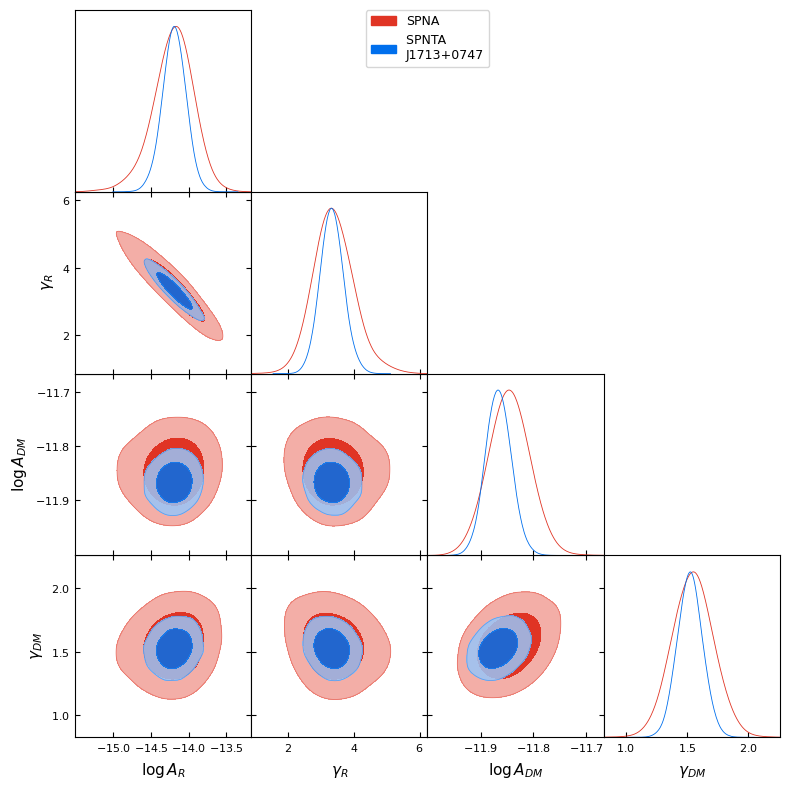

In [17]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA+INPTA_All.png',dpi=300)
plt.show()

In [18]:
# %matplotlib inline
# diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

In [19]:
# %matplotlib inline
# g = plots.get_subplot_plotter()
# #nsig=utilities.from_confidence_to_sigma(shift_probability)
# #getdist.plots.GetDistPlotSettings()
# g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
#                         str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
# #g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
# plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [20]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

spna_red=MCSamples(samples=np.array(spna_arr_red).transpose(),loglikes=loglike_spna,names=names_r,labels=labels_r,label='SPNA')
spnta_red=MCSamples(samples=np.array(spnta_arr_red).transpose(),loglikes=loglike_spnta,names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

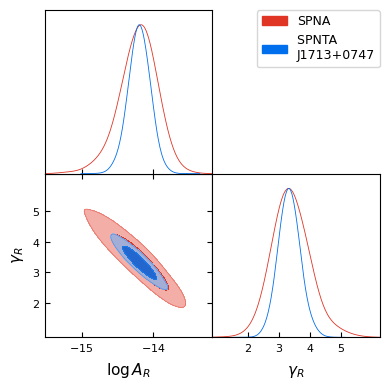

In [21]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_red,spnta_red], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_red.png',dpi=300)
plt.show()

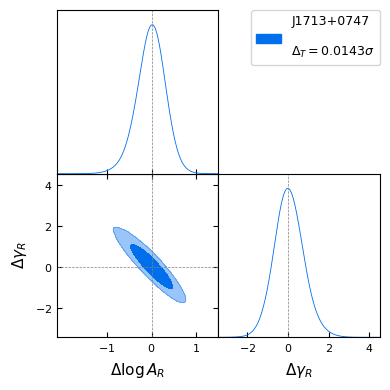

In [22]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(spna_red,spnta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_r, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_red.png',dpi=300)

# Tension considering dm noise only

In [23]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [24]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=loglike_spna,names=names_dm,labels=labels_dm,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=loglike_spnta,names = names_dm,labels=labels_dm,label='SPNTA \n'+psrname)

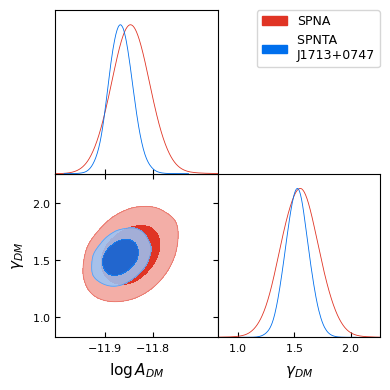

In [25]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_dm.png',dpi=300)
plt.show()

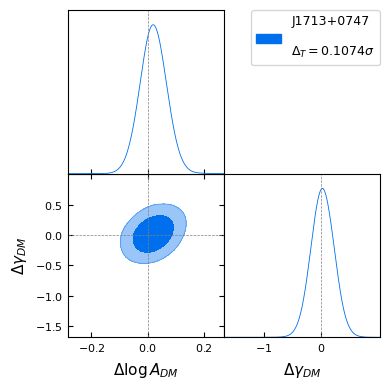

In [26]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)